In [1]:
%pylab
%matplotlib inline
import pandas as pd
import numpy as np
import graphlab as gl

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_excel(r'E:\Datasets2\data.xlsx', sheet_name = 'Sheet1')
print df

                   群名  群类别  群人数     消息数       稠密度       性别比       平均年龄  \
0               **手酒吧    1   63     315  0.051715  0.882353  26.681818   
1               **秀嘉园    1   73       2  0.010274  0.579710  27.500000   
2         **ˇ⒊無黒\噵丶⒈群    1   73       4  0.024163  0.750000  23.415385   
3         **海网管工作联系基地    1   91      14  0.006105  0.901639  29.409091   
4     tbsgame.net/bbs    1  133    2112  0.011107  0.961832  30.319672   
5          **拜DOTA粉丝群    1   85      91  0.035014  0.903614  26.112500   
6               **踏联盟    1   60      22  0.038136  0.807692  29.738095   
7               **手军团    1   74     115  0.086264  0.833333  26.313433   
8             **度赤水贴吧    1   55    1940  0.091919  0.759259  24.415094   
9             **涂鸦天津+    1   63      48  0.043779  0.838710  23.933333   
10       ns万有引力--颓废1群    1   72     177  0.016041  0.873239  22.415385   
11         **弟盟罗马战队总群    1  203    4615  0.019583  0.935323  28.200000   
12            **我的领地③    1   81       

In [3]:
avr_age = df[u'平均年龄']
print type(avr_age)

<class 'pandas.core.series.Series'>


In [4]:
avrAge = np.array(avr_age)
print avrAge

[ 26.68181818  27.5         23.41538462 ...,  25.72380952  27.08571429
  27.22330097]


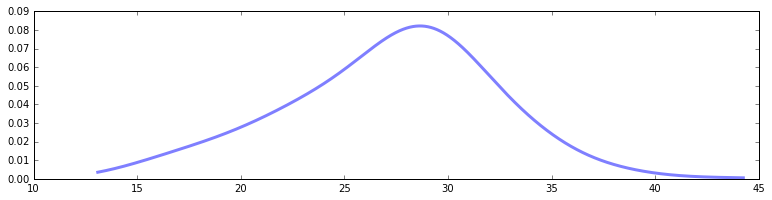

In [5]:
'''
from scipy.stats import gaussian_kde
def kde_scipy(x, x_grid, bandwidth, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)
x_grid = np.linspace(min(avrAge), max(avrAge), 10000)
pdf = kde_scipy(avrAge, x_grid, bandwidth = 2)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, sharey=True,
                       figsize=(13, 3))
fig.subplots_adjust(wspace=0)
ax.plot(x_grid, pdf, color='blue', alpha=0.5, lw=3)
'''

In [6]:
from sklearn.neighbors import KernelDensity
def kde_sklearn(x, x_grid, bandwidth, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)
import sklearn
#from sklearn.grid_search import GridSearchCV
#grid = GridSearchCV(KernelDensity(),
#                    {'bandwidth': np.linspace(min(avrAge), max(avrAge), 200)},
#                    cv=20) # 20-fold cross-validation
#grid.fit(avrAge[:, None])
#print grid.best_params_

{'bandwidth': 13.097826087}


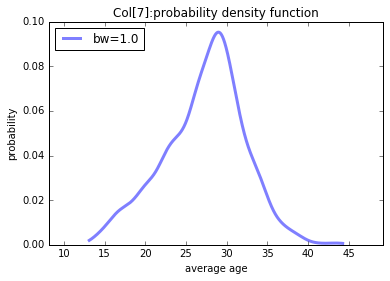

In [162]:
#kde = grid.best_estimator_
#pdf = np.exp(kde.score_samples(x_grid[:, None]))

#画出col[7]的pdf

x_grid = np.linspace(min(avrAge), max(avrAge), 10000)
pdf = kde_sklearn(avrAge, x_grid, bandwidth = 1)

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.1f' % 1)
#ax.hist(avrAge, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=True)
ax.legend(loc='upper left')
ax.set_xlim(min(avrAge)-5, max(avrAge)+5);
ax.set_title('Col[7]:probability density function')
ax.set_xlabel('average age')
ax.set_ylabel('probability')

In [16]:
#test the normality of Col[7]
from scipy.stats import normaltest
normaltest(avrAge, None, 'omit')

NormaltestResult(statistic=24.479341544296894, pvalue=4.8348001102946654e-06)

In [26]:
group1 = df[df[u'群类别']==1]
group2 = df[df[u'群类别']==2]
group3 = df[df[u'群类别']==3]
group4 = df[df[u'群类别']==4]
group5 = df[df[u'群类别']==5]

In [27]:
age1 = np.array(group1[u'平均年龄'])
age2 = np.array(group2[u'平均年龄'])
age3 = np.array(group3[u'平均年龄'])
age4 = np.array(group4[u'平均年龄'])
age5 = np.array(group5[u'平均年龄'])

In [28]:
def test_normality(a):
    s, p = normaltest(a, None, 'omit')
    print s, p
test_normality(age1)
test_normality(age2)
test_normality(age3)
test_normality(age4)
test_normality(age5)

7.95994294603 0.0186861723903
5.51322664066 0.0635064806804
2.99611793761 0.223563683355
15.0812272153 0.000531071652163
90.5023380462 2.22672709451e-20


In [33]:
#检验方差分布
def std_ratio(a1, a2, a3, a4, a5):
    s1 = np.std(a1)
    s2 = np.std(a2)
    s3 = np.std(a3)
    s4 = np.std(a4)
    s5 = np.std(a5)
    ratio = float(max(s1, s2, s3, s4, s5))/ min(s1, s2, s3, s4, s5)
    print ratio
    if ratio > 2:
        print "does not match anova assumption"
    else:
        print "match anova assumption"

In [34]:
std_ratio(age1, age2, age3, age4, age5)

2.04551837158
does not match anova assumption


In [36]:
#one-way anova
from scipy.stats import f_oneway
a = [5,6,6,7,7,8,9,10]
b = [7,7,8,9,9,10,10,11]
c = [7,9,9,10,10,10,11,12,13]
f_oneway(age1, age2, age3, age4, age5)

F_onewayResult(statistic=171.50703270711966, pvalue=1.0820916064752822e-126)

## 由于平均年龄不符合正态分布，方差也不齐，故进行log变换，然后anova

In [91]:
from scipy.stats import boxcox
log1 = boxcox(age1, 0.7, None)
log2 = boxcox(age2, 1.7, None)
log3 = boxcox(age3, 1.7, None)
log4 = boxcox(age4, 0.7, None)
log5 = boxcox(age5, 2.67, None)
#检验log变换后的数据是否符合正太分布
test_normality(log1)
test_normality(log2)
test_normality(log3)
test_normality(log4)
test_normality(log5)

4.615611089 0.0994793151367
0.139809411749 0.932482675793
1.84175518776 0.398169456631
5.66072039821 0.0589916011201
33.2409527377 6.05088398802e-08


In [92]:
np.log(2.7)

0.99325177301028345

In [103]:
#另选三列：性别比，年龄差、地域集中度
def get_array(df, s):
    a = np.array(df[s])
    return a
def get_nparray(df, s):
    group1 = df[df[u'群类别']==1]
    group2 = df[df[u'群类别']==2]
    group3 = df[df[u'群类别']==3]
    group4 = df[df[u'群类别']==4]
    group5 = df[df[u'群类别']==5]
    a1 = np.array(group1[s])
    a2 = np.array(group2[s])
    a3 = np.array(group3[s])
    a4 = np.array(group4[s])
    a5 = np.array(group5[s])
    return a1, a2, a3, a4, a5
a = get_array(df, u'性别比')
a1,a2,a3,a4,a5 = get_nparray(df, u'性别比')

In [140]:
def draw_pdf(array, bandwidth,i, xlabel):
    x_grid = np.linspace(min(array), max(array), 10000)
    pdf = kde_sklearn(array, x_grid, bandwidth)

    fig, ax = plt.subplots()
    ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.1f' % bandwidth)
    #ax.hist(a, 30, fc='gray', histtype='stepfilled', alpha=0.3, normed=False)
    ax.legend(loc='upper left')
    ax.set_xlim(min(array)-1, max(array)+1);
    ax.set_title('Col[' + str(i) + ']:probability density function')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('probability')

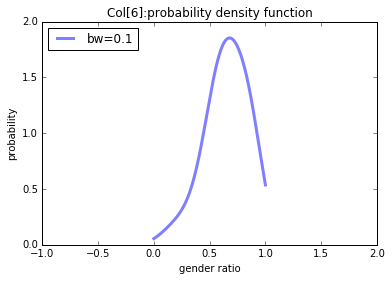

In [149]:
draw_pdf(a, 0.1, 6, 'gender ratio')

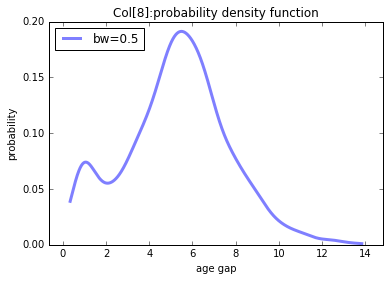

In [144]:
b = get_array(df, u'年龄差')
draw_pdf(b, 0.5, 8, 'age gap')#抽风的hist

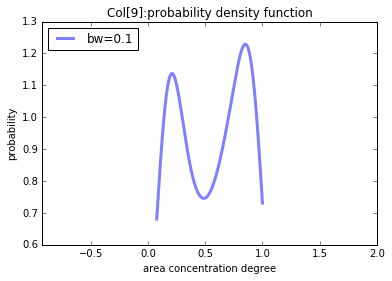

In [148]:
c = get_array(df, u'地域集中度')
draw_pdf(c, 0.1, 9, 'area concentration degree')

In [152]:
test_normality(a1)
test_normality(a2)
test_normality(a3)
test_normality(a4)
test_normality(a5)
std_ratio(a1, a2, a3, a4, a5)

45.4036935158 1.38265307562e-10
25.9447352046 2.32365866826e-06
11.4148318126 0.00332124387095
20.7890282102 3.05998911843e-05
122.089269771 3.08071781057e-27
2.06116295588
does not match anova assumption


In [153]:
b1, b2, b3, b4, b5 = get_nparray(df, u'年龄差')
test_normality(b1)
test_normality(b2)
test_normality(b3)
test_normality(b4)
test_normality(b5)
std_ratio(b1, b2, b3, b4, b5)

60.3045388223 8.03592320691e-14
0.0315450598637 0.984351205026
21.1914919455 2.50222288851e-05
84.6511425724 4.15181455435e-19
30.3953692229 2.51032201942e-07
1.58827897854
match anova assumption


In [154]:
c1, c2, c3, c4, c5 = get_nparray(df, u'地域集中度')
test_normality(c1)
test_normality(c2)
test_normality(c3)
test_normality(c4)
test_normality(c5)
std_ratio(c1, c2, c3, c4, c5)

85.698632937 2.45911197348e-19
534.415334284 8.9781041264e-117
81.787061761 1.73846196368e-18
50.8892154286 8.90322349505e-12
0.350770311521 0.839133761319
1.91375116748
match anova assumption


In [155]:
test_normality(a)
test_normality(b)
test_normality(c)

117.113019863 3.7087781624e-26
2.20617678649 0.331844632749
2.1498880641 0.341316857572


In [159]:
test_normality(np.log(a1))
test_normality(np.log(a2))
test_normality(np.log(a3))
test_normality(np.log(a4))
test_normality(np.log(a5))

198.152069693 9.37183809507e-44
165.174851077 1.35749054714e-36
75.9405515428 3.23384169421e-17
nan nan
563.596446416 4.13605828878e-123


In [160]:
test_normality(np.log(b1))
test_normality(np.log(b2))
test_normality(np.log(b3))
test_normality(np.log(b4))
test_normality(np.log(b5))

108.048285375 3.44836271986e-24
139.483321557 5.14732470302e-31
1.68946315498 0.429672676551
137.1305219 1.66911215231e-30
378.602358908 6.13115570182e-83


In [161]:
test_normality(np.log(c1))
test_normality(np.log(c2))
test_normality(np.log(c3))
test_normality(np.log(c4))
test_normality(np.log(c5))

2686.54663168 0.0
696.447081811 5.86729218108e-152
167.715753525 3.81054292253e-37
97.8326309345 5.70051532493e-22
72.4469450899 1.85500787804e-16
